# Chapter 4. Introduction to pandas

## Pandas Data Structure

### Series : index + values
### DataFrame : index + columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Creating Series

In [208]:
s1 = pd.Series([0, 1, 2, 3]);s1

0    0
1    1
2    2
3    3
dtype: int64

In [211]:
s2 = pd.Series([0, 1, 2, 3], index=['A', 'B', 'C', 'D']);s2

A    0
B    1
C    2
D    3
dtype: int64

#### Creating DataFrame

In [219]:
df = pd.DataFrame({'foo': ['x', 'y', 'z'],
                  'bar': [6, 10, None],
                  'baz': [True, True, False]}, columns=['foo', 'bar', 'baz']); df

foo   bar    baz
0   x   6.0   True
1   y  10.0   True
2   z   NaN  False

In [220]:
df.loc[0]

foo       x
bar       6
baz    True
Name: 0, dtype: object

In [221]:
df.loc[0:2]

foo   bar    baz
0   x   6.0   True
1   y  10.0   True
2   z   NaN  False

#### Conditional filtering --> baz = True 

In [222]:
df[df['baz']]

foo   bar   baz
0   x   6.0  True
1   y  10.0  True

In [227]:
df[(df['foo'] == 'x') | (df['foo'] == 'z')]

foo  bar    baz
0   x  6.0   True
2   z  NaN  False

### Merging DataFrame

In [230]:
df1 = pd.DataFrame({'a': [0, 1, 2, 3],
                  'b': [1, 2, 3, 4],
                  'c': [2, 3, 4, 5]}, index=['A', 'B', 'C', 'D']); df1

a  b  c
A  0  1  2
B  1  2  3
C  2  3  4
D  3  4  5

In [233]:
df2 = pd.DataFrame({'a': [0, 1, 2, 3, 4],
                   'b': [1, 2, 3, 4, 5]}, index=['A', 'B', 'C', 'D', 'E']);df2

a  b
A  0  1
B  1  2
C  2  3
D  3  4
E  4  5

In [235]:
df3 = df1 + df2; df3

a    b   c
A  0.0  2.0 NaN
B  2.0  4.0 NaN
C  4.0  6.0 NaN
D  6.0  8.0 NaN
E  NaN  NaN NaN

### indexing

In [248]:
df = pd.DataFrame({'foo': ['a', 'b', 'c', 'd'],
                  'bar': [6, 10, -2, 1],
                  'baz': [True, True, False, True]}, columns=['foo', 'bar', 'baz']); df

foo  bar    baz
0   a    6   True
1   b   10   True
2   c   -2  False
3   d    1   True

In [249]:
df.index.values

array([0, 1, 2, 3], dtype=int64)

In [250]:
df.set_index('foo', inplace=True);df

bar    baz
foo            
a      6   True
b     10   True
c     -2  False
d      1   True

In [251]:
df.loc['a']

bar       6
baz    True
Name: a, dtype: object

In [252]:
df.iloc[0]

bar       6
baz    True
Name: a, dtype: object

In [259]:
df.set_index([['one', 'one', 'two', 'two'], df.index], inplace=True)

In [260]:
df

bar    baz
    foo            
one a      6   True
    b     10   True
two c     -2  False
    d      1   True

In [261]:
df.loc['one']

bar   baz
foo           
a      6  True
b     10  True

In [262]:
df.loc['one', 'a']

bar       6
baz    True
Name: (one, a), dtype: object

In [263]:
df.T

one          two      
foo     a     b      c     d
bar     6    10     -2     1
baz  True  True  False  True

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

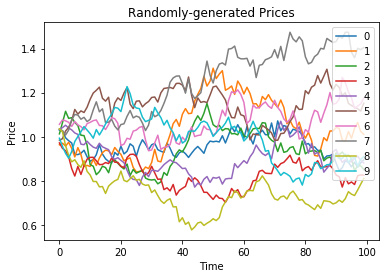

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
s

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64

Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [5]:
print(s.name)

None


This name can be directly modified with no repercussions.

In [6]:
s.name = "Toy Series"
s.name

'Toy Series'

We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [7]:
s.index

RangeIndex(start=0, stop=5, step=1)

pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [8]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')

An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [9]:
s.index = new_index
s.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')

The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [10]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

First element of the series:  1.0
Last element of the series:  5.0


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [11]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [12]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [13]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [14]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [15]:
s.loc['2016-01-01']

1.0

Or even for a range of dates!

In [16]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [17]:
s < 3

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool

We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [18]:
s.loc[s < 3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [19]:
s.loc[(s < 3) & (s > 1)]

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels. We can modify this index however we like.

In [65]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2016-01-01')     
df = get_price_data({'q': "CMG", 'i': "86400", 'x': "NYSE", 'p': "20Y" }).loc[start : end]
prices = df.Close

We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [67]:
print("\n", type(prices))
print(prices.head(5))


 <class 'pandas.core.series.Series'>
2012-01-04 06:00:00    341.27
2012-01-05 06:00:00    348.75
2012-01-06 06:00:00    350.48
2012-01-07 06:00:00    348.95
2012-01-10 06:00:00    339.74
Name: Close, dtype: float64


As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

In [68]:
print('Old name: ', prices.name)
prices.name = "CMG"
print('New name: ', prices.name)

Old name:  Close
New name:  CMG


Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [69]:
prices.index

DatetimeIndex(['2012-01-04 06:00:00', '2012-01-05 06:00:00',
               '2012-01-06 06:00:00', '2012-01-07 06:00:00',
               '2012-01-10 06:00:00', '2012-01-11 06:00:00',
               '2012-01-12 06:00:00', '2012-01-13 06:00:00',
               '2012-01-14 06:00:00', '2012-01-18 06:00:00',
               ...
               '2015-12-17 06:00:00', '2015-12-18 06:00:00',
               '2015-12-19 06:00:00', '2015-12-22 06:00:00',
               '2015-12-23 06:00:00', '2015-12-24 06:00:00',
               '2015-12-25 06:00:00', '2015-12-29 06:00:00',
               '2015-12-30 06:00:00', '2015-12-31 06:00:00'],
              dtype='datetime64[ns]', length=1005, freq=None)

Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [70]:
monthly_prices = prices.resample('M').mean()
monthly_prices.head(10)

2012-01-31    354.173158
2012-02-29    378.389000
2012-03-31    406.272609
2012-04-30    423.254211
2012-05-31    405.854545
2012-06-30    403.489545
2012-07-31    356.958000
2012-08-31    294.695652
2012-09-30    324.619500
2012-10-31    277.675500
Freq: M, Name: CMG, dtype: float64

median() 을 이용하여 중간값을 `resample()` 할 수 있다.

In [71]:
monthly_prices_med = prices.resample('M').median()
monthly_prices_med.head(10)

2012-01-31    354.620
2012-02-29    376.970
2012-03-31    407.080
2012-04-30    422.260
2012-05-31    405.240
2012-06-30    403.255
2012-07-31    381.665
2012-08-31    295.390
2012-09-30    332.660
2012-10-31    286.590
Freq: M, Name: CMG, dtype: float64

We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [72]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M').apply(custom_resampler)
first_of_month_prices.head(10)

2012-01-31    341.27
2012-02-29    367.29
2012-03-31    390.22
2012-04-30    418.40
2012-05-31    414.15
2012-06-30    413.07
2012-07-31    383.46
2012-08-31    292.33
2012-09-30    288.64
2012-10-31    316.13
Freq: M, Name: CMG, dtype: float64

모든 time series 는`reindex()` 내장 method 를 이용하여 현재의 data 를 새로운 index label 에 따라 realign 할 수 있다. label 에 해당하는 data 가 없는 경우는 `np.nan` 으로 채워지거나 우리가 지정한 fill method 로 채워진다.

예를 들어 위에서 구한 prices data 는 매일 시장이 열리지 않으므로 모든 calendar day 를 가지고 있지 않은데, 다음과 같이 모든 calendar 일자로 reindexing 할 수 있다. 우선, 새로운 `DatetimeIndex` 를 생성한다.

In [73]:
calendar_dates = pd.date_range(start=start, end=end, freq='D')
calendar_dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns]', length=1462, freq='D')

Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

In [74]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01       NaN
2012-01-02       NaN
2012-01-03       NaN
2012-01-04       NaN
2012-01-05    341.27
2012-01-06    348.75
2012-01-07    350.48
2012-01-08    348.95
2012-01-09    348.95
2012-01-10    348.95
2012-01-11    339.74
2012-01-12    341.12
2012-01-13    347.60
2012-01-14    347.62
2012-01-15    354.62
Freq: D, Name: CMG, dtype: float64

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [75]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01    501.097294
2012-01-02    501.097294
2012-01-03    501.097294
2012-01-04    501.097294
2012-01-05    341.270000
2012-01-06    348.750000
2012-01-07    350.480000
2012-01-08    348.950000
2012-01-09    348.950000
2012-01-10    348.950000
Freq: D, Name: CMG, dtype: float64

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [76]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01    341.27
2012-01-02    341.27
2012-01-03    341.27
2012-01-04    341.27
2012-01-05    341.27
2012-01-06    348.75
2012-01-07    350.48
2012-01-08    348.95
2012-01-09    348.95
2012-01-10    348.95
Freq: D, Name: CMG, dtype: float64

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [77]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-05    341.27
2012-01-06    348.75
2012-01-07    350.48
2012-01-08    348.95
2012-01-09    348.95
2012-01-10    348.95
2012-01-11    339.74
2012-01-12    341.12
2012-01-13    347.60
2012-01-14    347.62
Freq: D, Name: CMG, dtype: float64

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

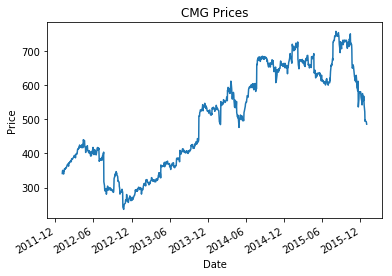

In [79]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title("CMG" + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [80]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

Mean:  501.658332338
Standard deviation:  146.760157392


In [81]:
print("Summary Statistics")
prices.describe()

Summary Statistics


count    1005.000000
mean      501.658332
std       146.760157
min       236.240000
25%       371.530000
50%       521.530000
75%       647.120000
max       757.770000
Name: CMG, dtype: float64

We can easily modify `Series` with scalars using our basic mathematical operators.

In [84]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2012-01-04 06:00:00    672.54
2012-01-05 06:00:00    687.50
2012-01-06 06:00:00    690.96
2012-01-07 06:00:00    687.90
2012-01-10 06:00:00    669.48
Name: CMG, dtype: float64

Series 전체에 대한 scalar 연산과 조합하여, matching 되는 개별 index 에 대한 elementwise 연산도 가능하다.

In [85]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2012-01-04 06:00:00    388.737237
2012-01-05 06:00:00    385.510781
2012-01-06 06:00:00    372.339504
2012-01-07 06:00:00    340.718159
2012-01-10 06:00:00    380.501785
dtype: float64

matching index 가 없으면 empty series 가 return 된다.

In [87]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-04 06:00:00   NaN
2012-01-05 06:00:00   NaN
2012-01-06 06:00:00   NaN
2012-01-07 06:00:00   NaN
2012-01-10 06:00:00   NaN
dtype: float64

Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [88]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

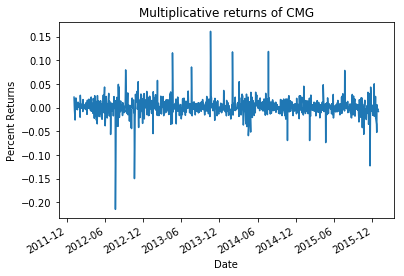

In [90]:
plt.title("Multiplicative returns of " + "CMG")
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [92]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.name = "30-day rolling mean"

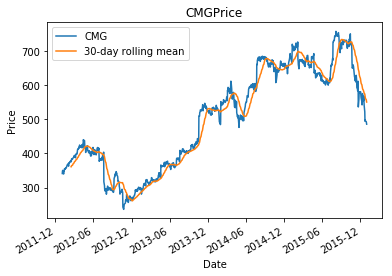

In [94]:
prices.plot()
rolling_mean.plot()
plt.title("CMG" + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [96]:
rolling_std = prices.rolling(30).std()
rolling_std.name = "30-day rolling volatility"

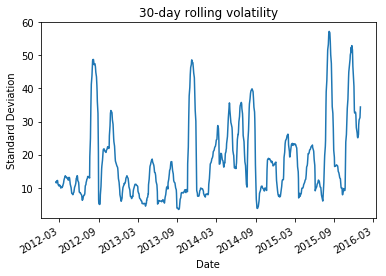

In [97]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [98]:
np.median(mult_returns)

0.00024812532616858007

The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [99]:
mult_returns.median()

0.0002481253261685801

In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [101]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
dict_data

{'a': [1, 2, 3, 4, 5],
 'b': ['L', 'K', 'J', 'M', 'Z'],
 'c': array([ 0.21391455,  1.40710306,  0.47050246,  1.63767981, -1.1739516 ])}

Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [102]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
frame_data

a  b         c
2016-01-01  1  L  0.213915
2016-01-02  2  K  1.407103
2016-01-03  3  J  0.470502
2016-01-04  4  M  1.637680
2016-01-05  5  Z -1.173952

As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [103]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
numbers

Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9

We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [104]:
numbers.columns

Index(['Evens', 'Odds'], dtype='object')

To modify the columns after object creation, we need only do the following:

In [105]:
numbers.columns = ['Shmevens', 'Shmodds']
numbers

Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9

In the same vein, the index of a `DataFrame` can be changed after the fact.

In [106]:
numbers.index

RangeIndex(start=0, stop=5, step=1)

In [107]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
numbers

Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9

Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [108]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]], dtype=int64)

This returns a NumPy array.

In [109]:
type(numbers.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [150]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

def multi_returns(start, end, symbols):
    columns = []
    for symbol, market in symbols:
        columns.append(symbol)
        
    df = pd.DataFrame(columns=columns)
    
    for symbol, market in symbols:
        df[symbol] = pd.DataFrame(get_price_data({'q': symbol, 'i': "86400", 'x': market, 'p': "20Y" }))\
                                ['Close'].loc[start : end]
    
    df.index = pd.to_datetime(df.index.date)
    return df
        
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2016-02-01')     
prices = multi_returns(start, end, [("CMG","NYSE"), ("MCD","NYSE"), ("SHAK","NYSE"), ("WFM","NASD")])

Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [121]:
prices.CMG.head()

2012-01-04    341.27
2012-01-05    348.75
2012-01-06    350.48
2012-01-07    348.95
2012-01-10    339.74
Name: CMG, dtype: float64

We can also use `loc[]` to access an individual column like so.

In [122]:
prices.loc[:, 'CMG'].head()

2012-01-04    341.27
2012-01-05    348.75
2012-01-06    350.48
2012-01-07    348.95
2012-01-10    339.74
Name: CMG, dtype: float64

Accessing an individual column will return a `Series`, regardless of how we get it.

In [123]:
print(type(prices.CMG))
print(type(prices.loc[:, 'CMG']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [124]:
prices.loc[:, ['CMG', 'MCD']].head()

CMG     MCD
2012-01-04  341.27   98.84
2012-01-05  348.75   99.39
2012-01-06  350.48   99.83
2012-01-07  348.95  100.60
2012-01-10  339.74   99.64

We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [125]:
prices.loc['2015-12-15':'2015-12-22']

CMG     MCD   SHAK    WFM
2015-12-15  558.16  116.26  40.16  33.34
2015-12-16  554.86  116.93  41.58  32.97
2015-12-17  567.83  117.84  40.17  33.65
2015-12-18  554.89  117.50  38.54  33.38
2015-12-19  541.08  116.66  39.75  32.75
2015-12-22  522.01  117.69  38.19  32.98

This plays nicely with lists of columns, too.

In [126]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

CMG     MCD
2015-12-15  558.16  116.26
2015-12-16  554.86  116.93
2015-12-17  567.83  117.84
2015-12-18  554.89  117.50
2015-12-19  541.08  116.66
2015-12-22  522.01  117.69

Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [127]:
prices.iloc[0:2, 1]

2012-01-04    98.84
2012-01-05    99.39
Name: MCD, dtype: float64

In [137]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + list(range(7, 100, 2)), [0, 3]].head(20)

CMG     WFM
2012-01-05  348.75  35.740
2012-01-07  348.95  36.440
2012-01-11  341.12  36.340
2012-01-13  347.62  35.960
2012-01-18  353.38  38.360
2012-01-20  358.09  38.660
2012-01-24  360.46  38.060
2012-01-26  363.14  38.575
2012-01-28  366.76  37.445
2012-02-01  367.29  37.015
2012-02-03  362.82  37.800
2012-02-07  371.63  38.205
2012-02-09  374.02  38.965
2012-02-11  376.45  40.810
2012-02-15  378.94  40.500
2012-02-17  382.04  40.300
2012-02-22  383.58  40.290
2012-02-24  386.80  40.510
2012-02-28  388.89  40.820
2012-03-01  390.22  40.370

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [138]:
prices.loc[prices.MCD > prices.WFM].head()

CMG     MCD  SHAK    WFM
2012-01-04  341.27   98.84   NaN  34.82
2012-01-05  348.75   99.39   NaN  35.74
2012-01-06  350.48   99.83   NaN  36.38
2012-01-07  348.95  100.60   NaN  36.44
2012-01-10  339.74   99.64   NaN  36.44

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [139]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

CMG    MCD   SHAK     WFM
2015-01-31  709.84  92.44  45.90  52.095
2015-02-03  712.55  92.51  43.99  53.150
2015-02-04  726.63  93.92  44.98  53.410
2015-02-05  676.00  94.05  41.32  53.680
2015-02-06  670.91  94.34  42.64  53.375

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [148]:
s_1 = get_price_data({'q': "TSLA", 'i': "86400", 'x': "NASD", 'p': "10Y" })['Close'].loc[start : end]
s_1.index = pd.to_datetime(s_1.index.date)
prices.loc[:,'TSLA'] = s_1
prices.head()

CMG     MCD  SHAK    WFM   TSLA
2012-01-04  341.27   98.84   NaN  34.82  28.08
2012-01-05  348.75   99.39   NaN  35.74  27.71
2012-01-06  350.48   99.83   NaN  36.38  27.12
2012-01-07  348.95  100.60   NaN  36.44  26.89
2012-01-10  339.74   99.64   NaN  36.44  27.25

It is also just as easy to remove a column.

In [149]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

CMG     MCD  SHAK    WFM
2012-01-04  341.27   98.84   NaN  34.82
2012-01-05  348.75   99.39   NaN  35.74
2012-01-06  350.48   99.83   NaN  36.38
2012-01-07  348.95  100.60   NaN  36.44
2012-01-10  339.74   99.64   NaN  36.44

If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [164]:
def SPY_return(start, end):
    df = get_prices_data( [{'q': ".INX", 'x': "INDEXSP",}], "20Y")
    df.index = pd.to_datetime(df.index)
    df = pd.DataFrame(df['.INX_Close'].loc[start:end])
    df.rename(columns={".INX_Close":"SPY"}, inplace = True)
    return df
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2016-01-31')     # Be cautious
df_1 = SPY_return(start, end)

In [171]:
df_2 = multi_returns(start, end, [("MSFT","NASD"), ("AAPL","NASD"), ("GOOG","NASD")])

In [172]:
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

SPY    MSFT     AAPL    GOOG
2012-01-04  1277.06  26.765  58.7500  332.37
2012-01-05  1277.30  27.400  59.0600  333.81
2012-01-06  1281.06  27.680  59.7200  329.18
2012-01-07  1277.81  28.105  60.3400  324.68
2012-01-10  1280.70  27.740  60.2471  310.92

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [173]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

CMG     MCD  SHAK    WFM
2012-01-04  341.27   98.84   0.0  34.82
2012-01-05  348.75   99.39   0.0  35.74
2012-01-06  350.48   99.83   0.0  36.38
2012-01-07  348.95  100.60   0.0  36.44
2012-01-10  339.74   99.64   0.0  36.44

In [174]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

CMG     MCD  SHAK    WFM
2012-01-04  341.27   98.84  45.9  34.82
2012-01-05  348.75   99.39  45.9  35.74
2012-01-06  350.48   99.83  45.9  36.38
2012-01-07  348.95  100.60  45.9  36.44
2012-01-10  339.74   99.64  45.9  36.44

But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [175]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

CMG    MCD   SHAK     WFM
2015-01-31  709.84  92.44  45.90  52.095
2015-02-03  712.55  92.51  43.99  53.150
2015-02-04  726.63  93.92  44.98  53.410
2015-02-05  676.00  94.05  41.32  53.680
2015-02-06  670.91  94.34  42.64  53.375

#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

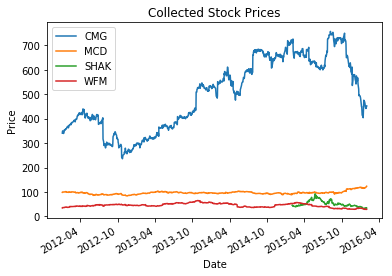

In [176]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [177]:
prices.mean(axis=0)

CMG     500.546433
MCD      97.019397
SHAK     52.153849
WFM      45.314658
dtype: float64

As well as the standard deviation:

In [178]:
prices.std(axis=0)

CMG     145.563966
MCD       6.366937
SHAK     12.554270
WFM       7.963859
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [179]:
prices.describe()

CMG          MCD        SHAK          WFM
count  1025.000000  1025.000000  252.000000  1024.000000
mean    500.546433    97.019397   52.153849    45.314658
std     145.563966     6.366937   12.554270     7.963859
min     236.240000    84.050000   31.920000    28.770000
25%     373.980000    93.720000   43.467500    39.167500
50%     515.380000    96.410000   48.555000    45.580000
75%     641.720000    99.310000   60.262500    51.622500
max     757.770000   123.780000   92.860000    65.240000

We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [180]:
(2 * prices - 50).head(5)

CMG     MCD  SHAK    WFM
2012-01-04  632.54  147.68   NaN  19.64
2012-01-05  647.50  148.78   NaN  21.48
2012-01-06  650.96  149.66   NaN  22.76
2012-01-07  647.90  151.20   NaN  22.88
2012-01-10  629.48  149.28   NaN  22.88

Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [181]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

CMG       MCD  SHAK       WFM
2012-01-05  0.021918  0.005565   NaN  0.026422
2012-01-06  0.004961  0.004427   NaN  0.017907
2012-01-07 -0.004365  0.007713   NaN  0.001649
2012-01-10 -0.026393 -0.009543   NaN  0.000000
2012-01-11  0.004062  0.000602   NaN -0.002744

If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

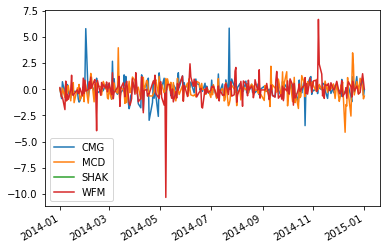

In [182]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [184]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

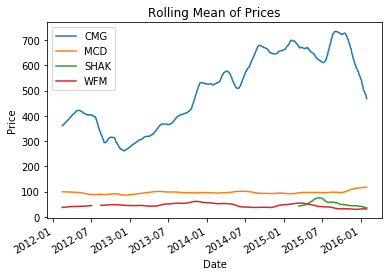

In [185]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

## Multi-Index

In [186]:
raw_data = {'city': ['Seoul', 'Seoul', 'Busan', 'Busan', 'Tae-gu', 'Tae-gu', 'Kwang-ju', 'Kwang-ju'],
           'rank': ['1st', '2nd', '1st', '2nd', '1st', '2nd', '1st', '2nd'],
           'name': ['Kim', 'Lee', 'Oh', 'Park', 'Kevin', 'Mary', 'John', 'Mark'],
           'score1': [90, 80, 70, 50, 40, 30, 60, 90],
           'score2': [10, 20, 30, 40, 50, 60, 70, 80]}

In [203]:
df = pd.DataFrame(raw_data, columns=['city', 'rank', 'name', 'score1', 'score2'])
df.set_index(['city', 'rank'], drop=False, inplace=True)

In [204]:
df

city rank   name  score1  score2
city     rank                                      
Seoul    1st      Seoul  1st    Kim      90      10
         2nd      Seoul  2nd    Lee      80      20
Busan    1st      Busan  1st     Oh      70      30
         2nd      Busan  2nd   Park      50      40
Tae-gu   1st     Tae-gu  1st  Kevin      40      50
         2nd     Tae-gu  2nd   Mary      30      60
Kwang-ju 1st   Kwang-ju  1st   John      60      70
         2nd   Kwang-ju  2nd   Mark      90      80

In [205]:
df.index

MultiIndex(levels=[['Busan', 'Kwang-ju', 'Seoul', 'Tae-gu'], ['1st', '2nd']],
           labels=[[2, 2, 0, 0, 3, 3, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['city', 'rank'])

In [206]:
df.score1

city      rank
Seoul     1st     90
          2nd     80
Busan     1st     70
          2nd     50
Tae-gu    1st     40
          2nd     30
Kwang-ju  1st     60
          2nd     90
Name: score1, dtype: int64

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).